In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
data = pd.read_csv(url)
# Save the DataFrame to a CSV file
data.to_csv("tips_data.csv", index=False)  # Set index=False to avoid saving the index column

print("Data saved to tips_data.csv")

Data saved to tips_data.csv


In [3]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)    # None means no limit on rows
pd.set_option('display.max_columns', None) # None means no limit on columns

# Now printing will show everything
print(data)

# Reset options after viewing if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
# Step 3: Model building
X = data[['total_bill']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model details
from IPython.display import display
display(model)

# Alternatively, print the model's parameters
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

LinearRegression()

Intercept: 1.0285439454607272
Coefficient: [0.0968534]


C:\Users\Main Profile\.conda\envs\notebook-6.4.3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


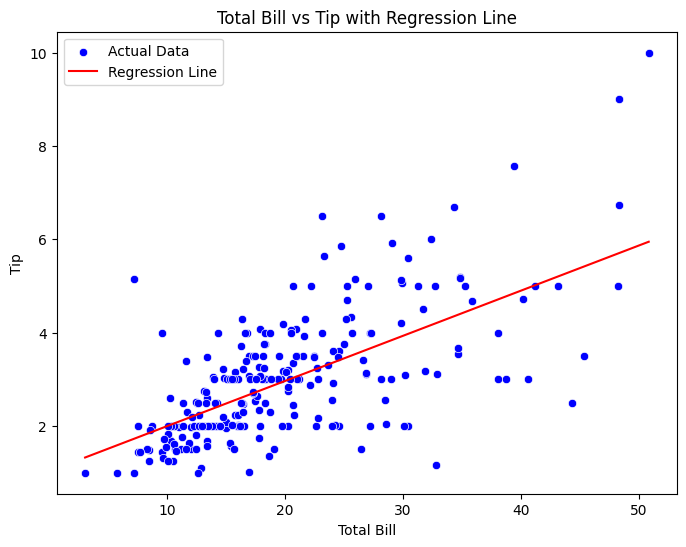

In [8]:
plt.figure(figsize=(8, 6))  # Make sure plt is used correctly
sns.scatterplot(data=data, x="total_bill", y="tip", color="blue", label="Actual Data")

# Adding a line plot for the regression line
X_line = np.linspace(data['total_bill'].min(), data['total_bill'].max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Plotting the regression line
plt.plot(X_line, y_line, color="red", label="Regression Line")
plt.title("Total Bill vs Tip with Regression Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.show()

In [9]:
# Step 4: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.821309064276629
R-squared: 0.5906895098589039
Root Mean Squared Error (RMSE): 0.9062610353957787
